## Observations and Insights 

1. The two most effective drugs based on a lower tumor volume (mm3) appear to be Ramicane and Capomulin, as referenced with the summary statistics table.
2. There is a steady correlation between mouse weight and tumor volume, with a 0.88 correlation coefficient.
3. The least effective drug is Ketapril and Naftisol with the highest variances, standard deviations, sem of tumor volume (mm3) in mouses. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_df = pd.DataFrame({"Mice Total":[merged_df["Mouse ID"].value_counts().sum()]})
total_df

,Mice Total
0,1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#merged_df[merged_df['Mouse ID'].duplicated()].sum()
#Source Reference:https://datatofish.com/count-duplicates-pandas/
duplicate = merged_df.pivot_table(index=['Mouse ID', 'Timepoint'], aggfunc = 'size')

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate)

Mouse ID  Timepoint
a203      0            1
          5            1
          10           1
          15           1
          20           1
                      ..
z969      25           1
          30           1
          35           1
          40           1
          45           1
Length: 1888, dtype: int64


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Source Reference:https://stackoverflow.com/questions/12497402/python-pandas-remove-duplicates-by-columns-a-keeping-the-row-with-the-highest
final_df = merged_df.groupby('Mouse ID', group_keys=False).apply(lambda x: x.loc[x.Timepoint.idxmax()])

#Rename index 
final_df.reset_index(drop=True, inplace=True)

#Display data 
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df = pd.DataFrame({"Mice Total":[final_df["Mouse ID"].value_counts().sum()]})
clean_df

,Mice Total
0,249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Drug Regimen Count to be able to assess each regimen 
drug = final_df["Drug Regimen"].value_counts()
drug

#To collect data 
grouped_regimen_df = final_df.groupby('Drug Regimen')

#Mean of all regimens
average_regimen = grouped_regimen_df['Tumor Volume (mm3)'].mean()

#Median of all regimens
median_regimen = grouped_regimen_df['Tumor Volume (mm3)'].median()

#Variance of all regimens
variance_regimen = grouped_regimen_df['Tumor Volume (mm3)'].var()

#Standard Deviation of all regimens
stdev_regimen = grouped_regimen_df['Tumor Volume (mm3)'].std()

#SEM of all regimens 
sem_regimen = grouped_regimen_df['Tumor Volume (mm3)'].sem()

#Group values together to display in table format 
drug_df = pd.concat([average_regimen, median_regimen, 
                     variance_regimen, stdev_regimen, sem_regimen],
                     axis=1,keys=('Average (mm3)','Median (mm3)',
                                 'Variance (mm3)', 'Standard Deviation (mm3)',
                                 'SEM (mm3)'))

#To round and format values correctly in table
drug_df["Average (mm3)"] = drug_df["Average (mm3)"].map("{:.2f}".format)
drug_df["Median (mm3)"] = drug_df["Median (mm3)"].map("{:.2f}".format)
drug_df["Variance (mm3)"] = drug_df["Variance (mm3)"].map("{:.2f}".format)
drug_df["Standard Deviation (mm3)"] = drug_df["Standard Deviation (mm3)"].map("{:.2f}".format)
drug_df["SEM (mm3)"] = drug_df["SEM (mm3)"].map("{:.2f}".format)

drug_df

,Average (mm3),Median (mm3),Variance (mm3),Standard Deviation (mm3),SEM (mm3)
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


## Bar and Pie Charts

Text(0.5, 0, 'Treatment Regimen Type')

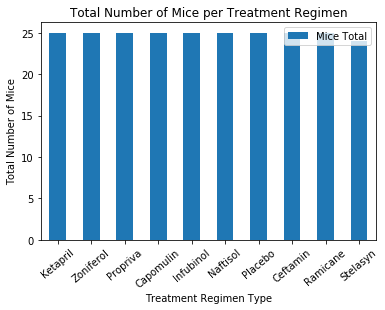

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_regimen_df = final_df.groupby('Drug Regimen')

#View how many mice are in each regimen and regimen info
drug = final_df["Drug Regimen"].value_counts()
drug

#Plot values of mice versus regimen type
data = pd.DataFrame({"Mice Total":[25,25,25,25,25,25,25,25,25,24]},
                    index=["Ketapril","Zoniferol","Propriva","Capomulin","Infubinol",
                    "Naftisol","Placebo","Ceftamin","Ramicane","Stelasyn"])

data.plot(kind = "bar")
plt.title("Total Number of Mice per Treatment Regimen")
plt.ylabel ("Total Number of Mice")
plt.xticks(rotation=40, horizontalalignment="center")
plt.xlabel ("Treatment Regimen Type")

Text(0.5, 0, 'Treatment Regimen Type')

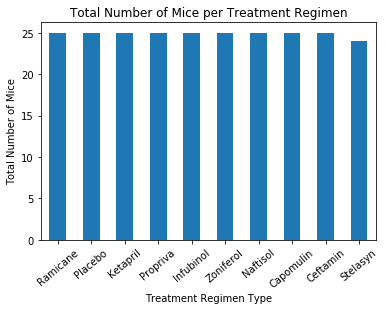

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
grouped_regimen_df = final_df.groupby('Drug Regimen')

#View how many mice are in each regimen and regimen info
drug = final_df["Drug Regimen"].value_counts()
drug

#Plot values of mice versus regimen type
final_df['Drug Regimen'].value_counts().plot(kind="bar", title = "Total Number of Mice per Treatment Regimen")
plt.ylabel ("Total Number of Mice")
plt.xticks(rotation=40, horizontalalignment="center")
plt.xlabel ("Treatment Regimen Type")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000261ADB9E048>],
      dtype=object)

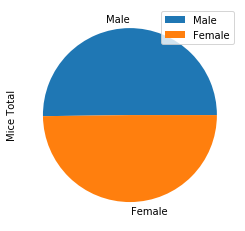

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender_df = final_df.groupby('Sex')

#View how many mice are in each gender
gender = final_df["Sex"].value_counts()
gender

#Plot values of mice versus gender type
gender = pd.DataFrame({"Mice Total":[125, 124]},
                      index=["Male", "Female"])
gender.plot(kind = "pie", subplots =True)


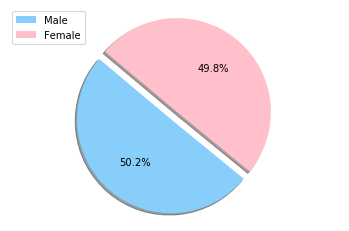

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Referenced from:https://pythonspot.com/matplotlib-pie-chart/

#Data layout
labels = 'Male','Female'
sizes = [125,124]
colors = ['lightskyblue', 'pink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True,startangle = 140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#group_df = final_df.groupby('Timepoint', group_keys=False).apply(lambda x: x.loc[x.Timepoint.idxmax()])
#group_df

grouped_regimen_df = final_df.groupby('Drug Regimen')
grouped_regimen_df.nunique()

done_df = final_df[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
done_df.reset_index(drop=True, inplace=True)
done_df

done_df.loc[done_df['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol','Ceftamin'])]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merger2_df = pd.merge(done_df, group_df, on="Tumor Volume (mm3)")
#merger2_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Infubinol,a203,45,67.973419
1,Infubinol,a251,45,65.525743
3,Ceftamin,a275,45,62.999356
6,Ramicane,a411,45,38.407618
7,Ramicane,a444,45,43.047543
...,...,...,...,...
239,Ceftamin,y769,45,68.594745
240,Capomulin,y793,45,31.896238
241,Ceftamin,y865,45,64.729837
245,Ramicane,z578,45,30.638696


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = done_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The median of tumor volumes is: {quartiles[0.5]} ")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
mice_vol = done_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]  
mice_vol
    
# Add subset 
sub_df = done_df[done_df["Drug Regimen"].isin(['Capomulin','Ramicane', 'Infubinol','Ceftamin'])]    
print("-----------------------------------------")
print (sub_df)
print("-----------------------------------------")
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 45.93471217
The upper quartile of tumor volume is: 64.95756185
The interquartile range of tumor volumes is: 19.022849680000007
The median of tumor volumes is: 55.84141007 
-----------------------------------------
    Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
0      Infubinol     a203         45           67.973419
1      Infubinol     a251         45           65.525743
3       Ceftamin     a275         45           62.999356
6       Ramicane     a411         45           38.407618
7       Ramicane     a444         45           43.047543
..           ...      ...        ...                 ...
239     Ceftamin     y769         45           68.594745
240    Capomulin     y793         45           31.896238
241     Ceftamin     y865         45           64.729837
245     Ramicane     z578         45           30.638696
246    Infubinol     z581         45           62.754451

[100 rows x 4 columns]
---------------------------------------

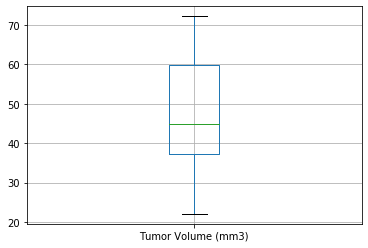

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Referenced from stackoverflow:https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
#sub_df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['Infubinol','Ceftamin','Capomulin','Ramicane'])
#sub_df.boxplot()
box_df = done_df[done_df['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol','Ceftamin'])]
box_df
bplot_df = box_df[['Drug Regimen', 'Tumor Volume (mm3)']]

#b_df = pd.DataFrame(box_df, columns = ['Capomulin','Ramicane', 'Infubinol','Ceftamin'])
bplot_df.boxplot()

## Line and Scatter Plots

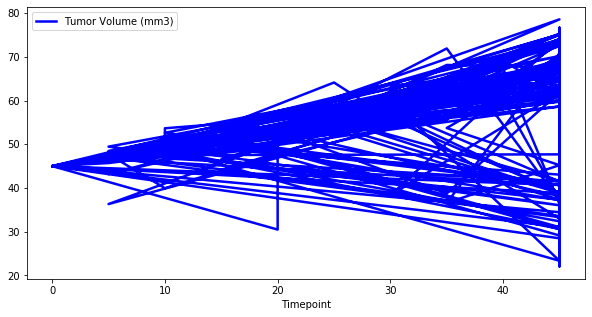

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = done_df[done_df['Mouse ID'].isin(['b128'])]
line_df
#lines = line_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)',figsize=(10,5), linewidth=2.5, color='blue')
lines = final_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)',figsize=(10,5), linewidth=2.5, color='blue')
#plt.xlabel('Timepoint')
#plt.ylabel('Tumor Volume (mm3)')
#plt.title('Time Vs. Tumor Volume (mm3) of Capomulin Mouse b128')

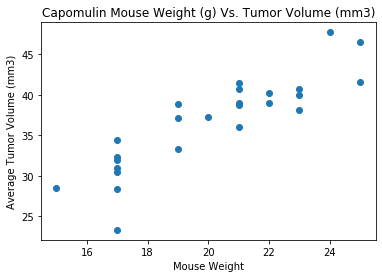

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_df = final_df[final_df["Drug Regimen"].isin(['Capomulin'])]    
scatter_df 

plt.scatter(scatter_df.iloc[:,4],scatter_df.iloc[:,6])
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title ('Capomulin Mouse Weight (g) Vs. Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

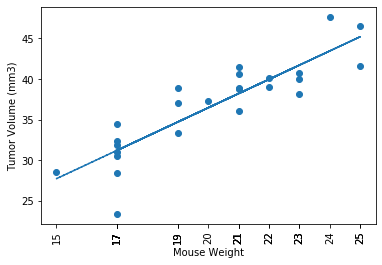

---------------------------------------------
The correlation between both factors is 0.88
---------------------------------------------


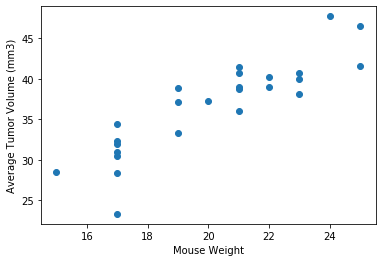

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Linear Regression----------------------------------------------------------

# Plot the linear model on top of scatter plot 
weight = scatter_df.iloc[:,4]
tumor = scatter_df.iloc[:,6]
plt.scatter(weight,tumor)

# Perform a linear regression on weight versus tumor volume (mm3)
l_slope, l_int, l_r, l_p, l_std_err = sts.linregress(weight, tumor)

# Create equation of line
l_fit = l_slope * weight + l_int
plt.plot(weight,l_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#Correlation-----------------------------------------------------------------
mouse_weight = scatter_df.iloc[:,4]
avgtumor_volume = scatter_df.iloc[:,6]
correlation = sts.pearsonr(mouse_weight,avgtumor_volume)

print("---------------------------------------------")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print("---------------------------------------------")

plt.scatter(mouse_weight,avgtumor_volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()